# Important links:
#### [Our World in Data website](https://ourworldindata.org/coronavirus-source-data)
#### [Our World in Data GitHub](https://github.com/owid/covid-19-data/tree/master/public/data/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from numpy import linspace

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\Python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [3]:
def owid_data(country_iso: str = None, path: str = None):
    """
    Plots some of the COVID-19 data for the given country or the whole world.

    Parameters
    ----------
    country_iso : str, optional
        International 3-letter country ISO code. If None, plots for the whole
        dataset.

    path: str, optional
        Path for downloaded dataset if offline. If None, only tries to dowload
        from the Internet.
    """

    try:
        data = pd.read_csv(
            'https://covid.ourworldindata.org/data/owid-covid-data.csv',
            parse_dates=['date'],
            low_memory=False
        )
    except:
        if path:
            print("Couldn't download, using the given path...")
            data = pd.read_csv(path, parse_dates=['date'], low_memory=False)
        else:
            # didn't want to create/import an Error, so just went with a simple
            # string
            return "Oopsy, couldn't download and no path given..."

    if country_iso and country_iso not in data.iso_code.unique():
        raise ValueError(f"Incorrect ISO code: '{country_iso}'")

    # key columns for the graphs
    cols = ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']

    # selecting country or the whole world
    if not country_iso:
        country_iso = 'OWID_WRL'
        country = 'the world'
    else:
        country = data[data.iso_code == country_iso].location.iloc[0]

    # selecting key columns
    data = data[(data.iso_code == country_iso) & (data.total_cases != 0)][cols]

    # plotting data
    plt.style.use('ggplot')
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8, 16))
    ax0.set_title(
        f'Cases and deaths of COVID-19 in {country} by date',
        y=1.05
    )
    red, blue = plt.cm.RdBu([0.01, 0.99])

    # total cases
    ax0.plot(data.date, data.total_cases, color=blue)

    # new cases
    ax2 = ax0.twinx()
    ax2.plot(data.date, data.new_cases, color=red)
    ax2.grid(None)

    # total deaths
    ax1.plot(data.date, data.total_deaths, color=blue)
    ax1.set_xlabel('Date')

    # new deaths
    ax3 = ax1.twinx()
    ax3.plot(data.date, data.new_deaths, color=red)
    ax3.grid(None)

    # prettifying plots
    for ax, ylabel, color in zip([ax0, ax1, ax2, ax3],
                                 ['Total cases',
                                  'Total deaths',
                                  'New cases',
                                  'New deaths'],
                                 [blue, blue, red, red]):
        ax.set_ylabel(ylabel, color=color)
        ax.tick_params('y', colors=color)
        ax.set_ylim(0)
        ax.set_yticks(linspace(*ax.get_ybound(), 10))

    plt.show(block=False)

C:\Program Files\Python38\lib\site-packages\matplotlib\lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


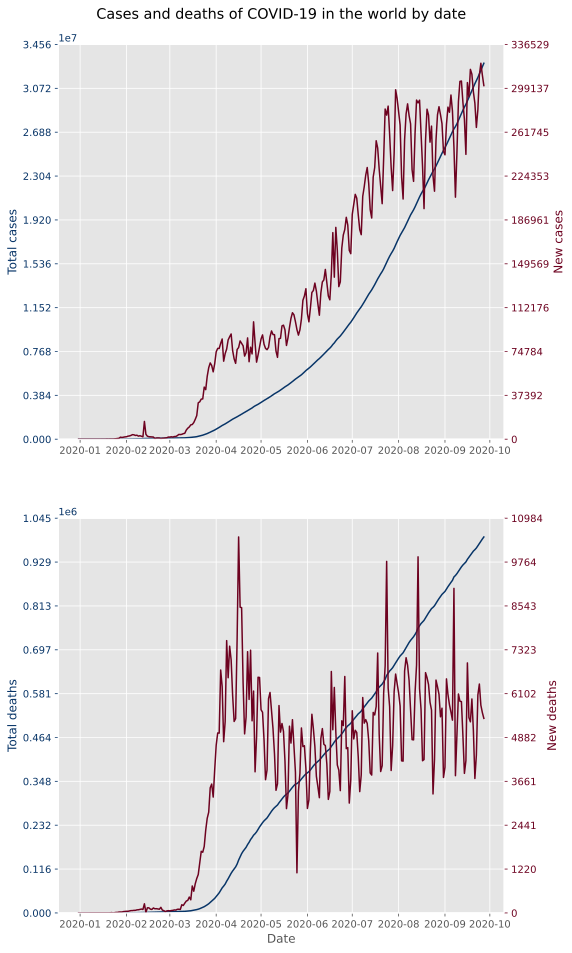

In [4]:
owid_data()

C:\Program Files\Python38\lib\site-packages\matplotlib\lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


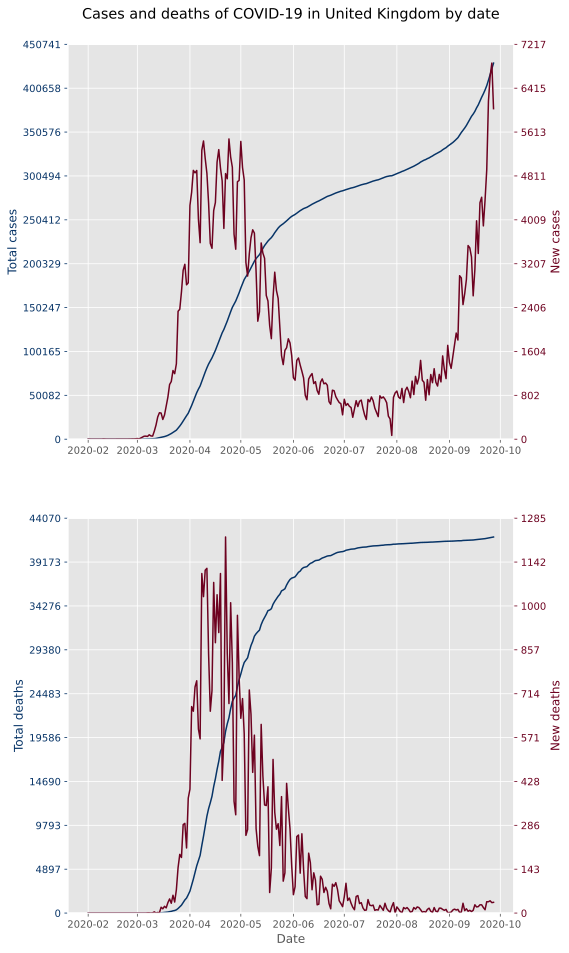

In [5]:
owid_data('GBR')

C:\Program Files\Python38\lib\site-packages\matplotlib\lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


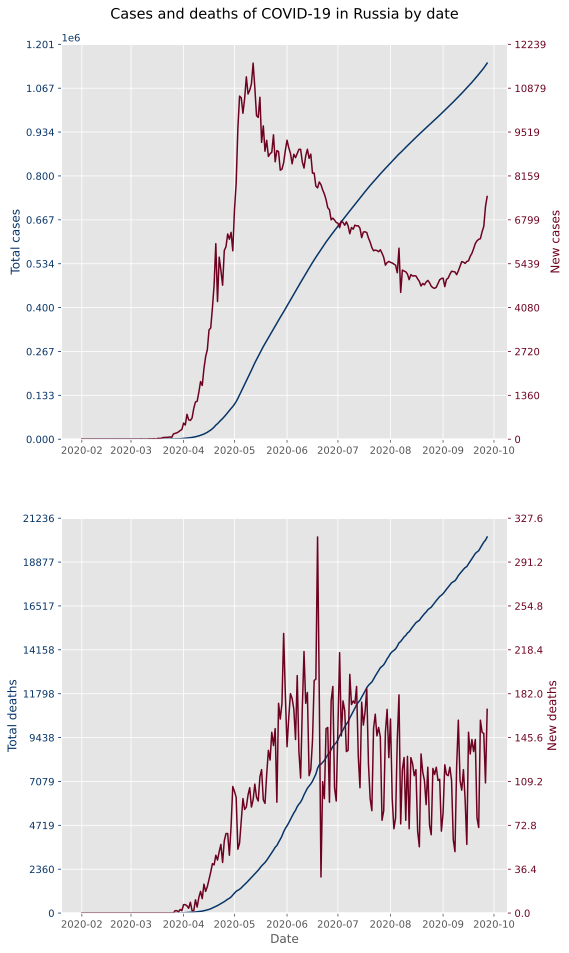

In [6]:
owid_data('RUS')

In [6]:
owid_data('provoking error')

ValueError: Incorrect ISO code: 'provoking error'